## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [173]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm

#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [174]:
df = pd.read_csv('ab_data.csv')
df.head(5)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [175]:
df.shape

(294478, 5)

In [176]:
# check for info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


c. The number of unique users in the dataset.

In [177]:
len(df.user_id.unique())

290584

d. The proportion of users converted.

In [178]:
df.query('converted == 1').count()[0]/df.shape[0]

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't match.

In [179]:
df.query('group == "treatment" and landing_page == "old_page"').count()[0] + df.query('group == "control" and landing_page == "new_page"').count()[0]

3893

f. Do any of the rows have missing values?

In [180]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [181]:
df2 = df.drop(df.query('group == "treatment" and landing_page == "old_page"').index)
df2 = df2.drop(df.query('group == "control" and landing_page == "new_page"').index)
df2.head(5)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [182]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [183]:
# check for info
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290585 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       290585 non-null  int64 
 1   timestamp     290585 non-null  object
 2   group         290585 non-null  object
 3   landing_page  290585 non-null  object
 4   converted     290585 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


In [184]:
len(df2.user_id.unique())

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [185]:
# here we look for duplicated user_id, but we show both of those in our result by keep=False
df2[df2.user_id.duplicated(keep=False)]['user_id']

1899    773192
2893    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [186]:
df2[df2.user_id.duplicated(keep=False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [187]:
df2.drop_duplicates(subset = ['user_id'], inplace = True)

In [188]:
# quick sanity check
df2.user_id.nunique()

290584

In [189]:
#  Double Check duplicate in user_id column - this should be 0
df2.user_id.duplicated().sum()

0

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [190]:
df2.converted.mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [191]:
# logic: query the group column value is control and take mean of the selected converted values
df2.query('group == "control"').converted.mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [192]:
# Same logic: query the group column value is treatment and take mean of the selected converted values
df2.query('group == "treatment"').converted.mean()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [193]:
df2.query('landing_page == "new_page"').count()[0]/df2.shape[0]

0.5000619442226688

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

* **Firstly, from part (d), we can tell that an individual received the new page with a chance of 50%, which means that there is an equal chance that an individual received the old page at the same time. In order words, people were randomly given a new or old page with no selection biased towards either page.**
* **Parts (a) to (c) show that the converted rates for old and new page are similar to the probability that an individual converted regardless of the page they receive, which are all around 12%. Just different at 3rd decimal point.**
* **Thus, based on what we have calculated, there is not sufficient evidence to conclude that the new treatment page results in more conversions. In fact, it is quite the opposite.**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Null Hypothesis:** The conversion rate of the old_page is greater than or the same as the conversion rate of the newpage.
$$H_0: p_{old} - p_{new} \geq 0$$
**Alternative Hypothesis:** The conversion rate of the old_page is less than the conversion rate of the newpage.
$$H_1: p_{old} - p_{new} < 0 ; $$

where $p_{old}$ and $p_{new}$ are the converted rates for the old and new pages.

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [194]:
# Calculate p_new = the conversion rate in df2 regardless of the page
p_new = df2.converted.mean()
p_new

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null?

In [195]:
# Calculate p_old = the conversion rate in df2 regardless of the page
p_old = df2.converted.mean() # the same as p_new
p_old

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [196]:
n_new = len(df2.query('landing_page == "new_page"'))
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [197]:
n_old = len(df2.query('landing_page == "old_page"'))
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [198]:
new_page_converted = np.random.binomial(n=1, p = p_new, size = n_new )
new_page_converted.mean()

0.1187598926433143

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [199]:
old_page_converted = np.random.binomial(n=1, p = p_old, size = n_old )
old_page_converted.mean()

0.1203312361468673

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [200]:
#since new_page_converted and old_page_converted have different sizes, 
#I use the mean to get the difference
new_page_converted.mean() - old_page_converted.mean()

-0.0015713435035530077

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [201]:
p_diffs = []
for _ in range(10000):
    new_page_converted = np.random.binomial(n=1, p = p_new, size = n_new )
    old_page_converted = np.random.binomial(n=1, p = p_old, size = n_old )
    diff = new_page_converted.mean() -  old_page_converted.mean()
    p_diffs.append(diff)    

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

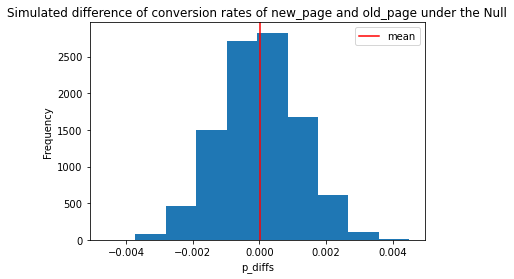

In [202]:
p_diffs = np.array(p_diffs)
plt.hist(p_diffs)
plt.title('Simulated difference of conversion rates of new_page and old_page under the Null')
plt.xlabel('p_diffs')
plt.ylabel('Frequency')
plt.axvline(x = p_diffs.mean(), color='r', label='mean')
plt.legend();

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [203]:
# Compute actual difference
actual_diff = df2.query('group == "treatment"').converted.mean() - df2.query('group == "control"').converted.mean()

In [204]:
# simulate distribution under the null hypothesis
null_vals = np.random.normal(0, p_diffs.std(), p_diffs.size)

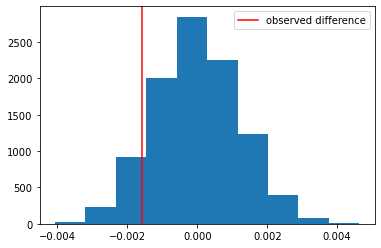

In [205]:
# plot null distribution
plt.hist(null_vals);

# plot line for observed statistic
plt.axvline(x= actual_diff, color ='red', label = 'observed difference')
plt.legend();

In [206]:
# compute p value
p_value = (null_vals > actual_diff).mean()
print(p_value)
print('{}% of the p_diffs are greater than the actual difference observed in ab_data.csv.'.format(p_value*100))

0.8995
89.95% of the p_diffs are greater than the actual difference observed in ab_data.csv.


k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

* **In scientific studies, the value calculated in part j is called p-value, which is the probability of observing our statistic (or one more extreme in favor of the alternative) if the null hypothesis is true.**
* **The computed p-value is much greater than the critical value of 0.05, which means that we fail to reject the null hypothesis. In other words, we do not have sufficient evidence that the new treatmen page has a higher converted rate than the old page.**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [207]:
import statsmodels.api as sm

convert_old = len(df2.query('group == "control" and converted ==1'))
convert_new = len(df2.query('group == "treatment" and converted ==1'))
n_old = len(df2.query('landing_page == "old_page"'))
n_new = len(df2.query('landing_page == "new_page"'))

In [208]:
convert_old, convert_new

(17489, 17264)

In [209]:
n_old, n_new

(145274, 145310)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [210]:
from statsmodels.stats.proportion import proportions_ztest
z_score, pval = proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')

In [211]:
# Print test statistic and p-value for the z-test
z_score, pval

(1.3109241984234394, 0.9050583127590245)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

* **A z-score illustrates how many standard deviations a value is away from the mean of a group of values. A positive z-score indicates that the our data point is above the mean.**
* **In terms of p-values, the finding in part k. (p-value = 0.9050) is very close to the p-value we computed earlier in part j. And both are higher than 0.05 significance level.**
* **Thus the conclusion is the same, which is that we can confidently say we fail to reject null hypothesis. In other words, we can not be confident with a 95% confidence level that the converted rate of the new_page is larger than the old_page.**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

> **In this case, we should use logistic regression.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [212]:
# Create ab_page column in df2
df2['ab_page'] = pd.get_dummies(df2['group']).treatment

# Create intercept column
df2['intercept'] = 1

# See how df2 looks like now
df2.head(5)

,user_id,timestamp,group,landing_page,converted,ab_page,intercept
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0,1


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [213]:
logit_mod = sm.Logit(df2['converted'], df2[['intercept','ab_page']])
results = logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [214]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Mon, 21 Jun 2021   Pseudo R-squ.:               8.077e-06
Time:                        15:50:20   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

In [215]:
# interpreet the ab_page coefficient
1/np.exp(results.params[1])

1.015102013696472

>***Coefficient interpretation:***  
>* *If an individual received the new page, it is **1.015 times** less likely for them to convert compared to when they received the old page holding all the other variables constant.*
>* *This is not what we want when launching the new page.*

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

**Answer:**
* **Firstly, p-value of *ab_page* is 0.19, which is greater the the critical value of 0.05, thus the coefficient is not statistically significant.**
* **The p-value found in the logistic regression model (0.19) is different than what we found in part II (p-value = 0.9) because of the different null and alternative hypotheses.**
    * In part II, the alternative hypothesis is that the conversion rate of the old page is less than that of the new page ($H_1: p_{old} < p_{new}$). This assumes a one-tailed test. 
    * While, in this part III, the alternative hypothesis is that the landing page type affects (positively or negatively) the conversion rate. In other words, the conversion rate of the old page is different to the conversion rate of the new page ($H_1: p_{old} \neq p_{new}$). This assumes a two-tailed test.
* **Interestingly, the absolute value of z-score in the logistic regression is the same as the number calculated in part II - m.**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Answer:**
* **It is a good idea to consider other factors that could affect whether or not an individual converts such as age, user type and geographic location, to add into our regression model.**
    * **Age:** younger users may prefer more modern and creative graphics on the pages while older users may prefer more information.
    * **User type:** if all individuals in this experiments are existing customers, they may be more reluctant to change from using the old page, which they have already got used to it, to using the new page, compared to the case when there are a mix of existing and new customers.
    * **Geographic location:** If the page is available in multiple languages, it can diversify our sample.
* **Adding more factors into the regression model will increase r-square and change confidence intervals.**
* **However, an disadvantage is that the model gets more complex.**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [216]:
# read file and join the dfs
countries_df = pd.read_csv('countries.csv')
df3 = df2.join(countries_df.set_index('user_id'), on='user_id')

# Quick check
df3.head()

,user_id,timestamp,group,landing_page,converted,ab_page,intercept,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0,1,US


In [217]:
# Check numbers of users in each country
df3.groupby('country').count()[['user_id']]

,user_id
country,
CA,14499
UK,72466
US,203619


In [218]:
# Mean conversion rate by landing_page
df3.groupby(['ab_page'], as_index=False).mean()[['ab_page', 'converted']]

,ab_page,converted
0,0,0.120386
1,1,0.118808


In [219]:
# Mean conversion rate by country
df3.groupby(['country'], as_index=False).mean()[['country', 'converted']]

,country,converted
0,CA,0.115318
1,UK,0.120594
2,US,0.119547


In [220]:
# Probability that an individual received the new page by country
df3.groupby(['country'], as_index=False).mean()[['country', 'ab_page']]

,country,ab_page
0,CA,0.503552
1,UK,0.498247
2,US,0.500459


> * **From the computed mean values, we can observe that the conversion rates are slightly different by country. In details, UK has the highest conversion rate of 12.06%, followed by US with 11.95% and CA with 11.5%.** 
> * **Moreover, in each and every country, an individual received the new page with a chance of around 50%, which means that there is an equal chance that an individual received the old page at the same time.**

In [221]:
# Create dummies for countries
df3[['ca', 'uk', 'us']] = pd.get_dummies(df3['country'])

# Drop country column
# df3.drop(columns = 'country', inplace = True )

df3.head(3)

,user_id,timestamp,group,landing_page,converted,ab_page,intercept,country,ca,uk,us
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1,US,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1,US,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,1


In [222]:
# Fitting linear model
df3['intercept'] = 1

# let's consider US being our baseline, therefore, us is not included
logit_mod = sm.Logit(df3['converted'], df3[['intercept','ab_page','uk', 'ca']])
results = logit_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Mon, 21 Jun 2021   Pseudo R-squ.:               2.323e-05
Time:                        15:50:22   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9893      0.009   -223.763      0.000      -2.007      -1.972
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
uk             0.0099      0.013      0.743      0.457      -0.016       0.036
ca            -0.0408      0.027     -1.516      0.130      -0.093       0.012
==============================================================================
"""

> **P-values for two country dummies are much higher than 0.05. Thus, the country does not appear to have influence on the convertion rate.**

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [223]:
# Check for possible interaction between landing page and country on conversion rate

# Mean conversion rate by country and landing_page
df3.groupby(['country','ab_page'], as_index=False).mean()[['country','ab_page','converted']]

,country,ab_page,converted
0,CA,0,0.118783
1,CA,1,0.111902
2,UK,0,0.120022
3,UK,1,0.121171
4,US,0,0.120630
5,US,1,0.118466


Let's keep considering US as our baseline. By running the logistic regression model with interaction variables, I will explore whether the impact of the landing page on conversion might work in the UK but not in the other countries, or Canada but not in other countries. Or the other way around.

In [224]:
# Interaction variables
df3['uk_ab_page'] = df3['uk'] * df3['ab_page']
df3['ca_ab_page'] = df3['ca'] * df3['ab_page']

df3.head(3)

,user_id,timestamp,group,landing_page,converted,ab_page,intercept,country,ca,uk,us,uk_ab_page,ca_ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1,US,0,0,1,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1,US,0,0,1,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,1,0,0


In [225]:
lm = sm.Logit(df3['converted'], df3[['intercept','ab_page','uk','uk_ab_page','ca','ca_ab_page']])
results = lm.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Mon, 21 Jun 2021   Pseudo R-squ.:               3.482e-05
Time:                        15:50:23   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9865      0.010   -206.344      0.000      -2.005      -1.968
ab_page       -0.0206      0.014     -1.505      0.132      -0.047       0.006
uk            -0.0057      0.019     -0.306      0.760      -0.043       0.031
uk_ab_page     0.0314      0.027      1.181      0.238      -0.021       0.084
ca            -0.0175      0.038     -0.465      0.642      -0.091       0.056
ca_ab_page    -0.0469      0.054     -0.872      0.383      -0.152       0.059
==============================================================================
"""

> ***Summary and conclusion on regression***
> * The p_values for both interaction terms is higher than 0.05.
> * Thus, the influence of landing page in the UK is not different to the influence of landing page in US holding all other variable constant.
> * And the influence of landing page in Canada is not different to the influence of landing page in US holding all other variable constant.
> * Based on the overlapping confidence intevals of *uk_ab_page* and *ca_ab_page*, we can also tell that the influence of landing page in UK is not different to the influence of landing page in Canada.

<a id='conclusions'></a>
## Conclusions

For this project, our goal was to help the e-commerce company understand if they should implement the new website or keep the old page by using three different methods as follows.

1. Probability based approach
2. A/B test
3. Regression approach

##### 1. Probability based approach:

* We found that an individual received the new page with a probability of 50%, which means that there is an equal chance that an individual received the old page at the same time.
* Moreover, there is not sufficient evidence to conclude that the new treatment page results in more conversions. In fact, it is quite the opposite with a conversion rate of 12.04% for the old page and 11.88% for the new page.

##### 2. A/B test:

* In this part, we set up our hypothesis to test if new page results in better conversion or not (one-tailed test).
* We simulated our user groups with respect to conversions, computed the p_value of 0.9061 and thus, failed to reject null hypothesis. 
* By using the built-in stats.proportions_ztest we computed z-score and p-value which confirmed our earlier p-value and failure to reject null hypothesis.
* Therefore, similar to the probability based approach, we can not be confident with a 95% confidence level that the converted rate of the new_page is larger than the old_page.

##### 3. Regression Approach:

* We changed our hypothesis to test whether conversion rate of the old page is different to the conversion rate of the new page (two-tailed test).
* With logistic regression results, we computed same z-score and the p-value of 0.190.
* Then we added geographic location of the users to find if any specific country had an effect on conversion.
* The result gave a similar outlook and suggested that neither the countries nor the interations between country and landing page influenced on the conversion rate.

##### Consideration and Recommendation:

* Due to Change aversion effect, a group of users may give an unfair advantage to the older page.
* Similarly, due to Novelty effect, users may give an unfair advantage to the newer page.

* Even the duration of this experiment is only 22 days, which is quite short for the A/B testing, the sample size is very large. In my opinion, prolonging the experiment on tesing the new_page is likely not necessary. 
* Instead, I recommend this e-commerce company to focus on the development of another new landing page with more productive features.

In [1]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

1

In [227]:
pip install nbconvert

Note: you may need to restart the kernel to use updated packages.
